In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Zadanie

Dysponujesz danymi z portalu Our World in Data dotyczącymi:
- Pierwotnej konsumpcji energii
- Emisji CO2 z poszczególnych lat dla różnych krajów

## Część 1: Plik CSV
Utwórz plik CSV zawierający połączone dane dla Polski:
- konsumpcja energii pierwotnej
- emisja CO2
- dane z poszczególnych lat

## Część 2: Plik Excel
Stwórz plik Excel z osobnymi zakładkami dla każdego kraju:
- UE
- USA
- Chiny
- Indie

Każda zakładka powinna zawierać dane o konsumpcji energii i emisji CO2.

## Część 3: Baza danych SQLite
Utwórz bazę danych SQLite z tabelą zawierającą:
- kraj
- rok
- emisja CO2
- konsumpcja energii

Dane powinny obejmować: Polskę, Niemcy i Hiszpanię.

## Część 4: Analiza i wizualizacja
Na podstawie danych z pliku Excel i bazy SQLite utwórz wykresy:
- emisja CO2 w zależności od roku (dla wybranego kraju)
- konsumpcja energii pierwotnej w zależności od roku (dla wybranego kraju)
- **dla chęnych szukanie koreacji**

In [ ]:
# Cz1

df_co2_pl = df_co2[df_co2['Entity'] == 'Poland']
df_primary_energy_pl = df_primary_energy[df_primary_energy['Entity'] == 'Poland']
df_poland = pd.merge(df_co2_pl, df_primary_energy_pl, on='Year', how='inner')
df_poland = df_poland[['Year', 'Annual CO₂ emissions (per capita)', 'Primary energy consumption (TWh)']]
df_poland.columns = ['Rok', 'Emisja CO2 (na osobę)', 'Konsumpcja energii pierwotnej (TWh)']
df_poland.to_csv('poland_energy_co2.csv', index=False)
print("Plik utworzony.")

Plik utworzony.


In [ ]:
# Cz2
countries = ['European Union (27)', 'United States', 'China', 'India']
country_data = {}
for country in countries:
    df_co2_country = df_co2[df_co2['Entity'] == country]
    df_primary_energy_country = df_primary_energy[df_primary_energy['Entity'] == country]
    df_country = pd.merge(df_co2_country, df_primary_energy_country, on='Year', how='inner')
    df_country = df_country[['Year', 'Annual CO₂ emissions (per capita)', 'Primary energy consumption (TWh)']]
    df_country.columns = ['Rok', 'Emisja CO2 (na osobę)', 'Konsumpcja energii pierwotnej (TWh)']
    country_data[country] = df_country

with pd.ExcelWriter('countries_energy_co2.xlsx') as writer:
    for country, df in country_data.items():
        sheet_name = country.replace(' (27)', '')
        df.to_excel(writer, sheet_name=sheet_name, index=False)
print("Plik utworzony.")

Plik utworzony.


In [ ]:
# Cz3
db_countries = ['Poland', 'Germany', 'Spain']
conn = sqlite3.connect('energy_co2.db')
cursor = conn.cursor()

cursor.execute('''
CREATE TABLE IF NOT EXISTS energy_data (
    Kraj TEXT,
    Rok INTEGER,
    "Emisja CO2 (na osobę)" REAL,
    "Konsumpcja energii pierwotnej (TWh)" REAL
)
''')

for country in db_countries:
    df_co2_country = df_co2[df_co2['Entity'] == country]
    df_primary_energy_country = df_primary_energy[df_primary_energy['Entity'] == country]
    df_country = pd.merge(df_co2_country, df_primary_energy_country, on='Year', how='inner')
    df_country = df_country[['Entity_x', 'Year', 'Annual CO₂ emissions (per capita)', 'Primary energy consumption (TWh)']]
    df_country.columns = ['Kraj', 'Rok', 'Emisja CO2 (na osobę)', 'Konsumpcja energii pierwotnej (TWh)']
    df_country.to_sql('energy_data', conn, if_exists='append', index=False)

conn.close()
print("Baza danych utworzona i wypelniona danymi.")

Baza danych utworzona i wypelniona danymi.


Dane wczytane dla kraju: Poland


,Rok,Emisja CO2 (na osobę),Konsumpcja energii pierwotnej (TWh)
0,1965,7.893703,776.05330
1,1966,7.996349,791.17820
2,1967,8.138128,814.29987
3,1968,8.597721,876.36676
4,1969,9.076116,936.06604


Ramka pusta? False


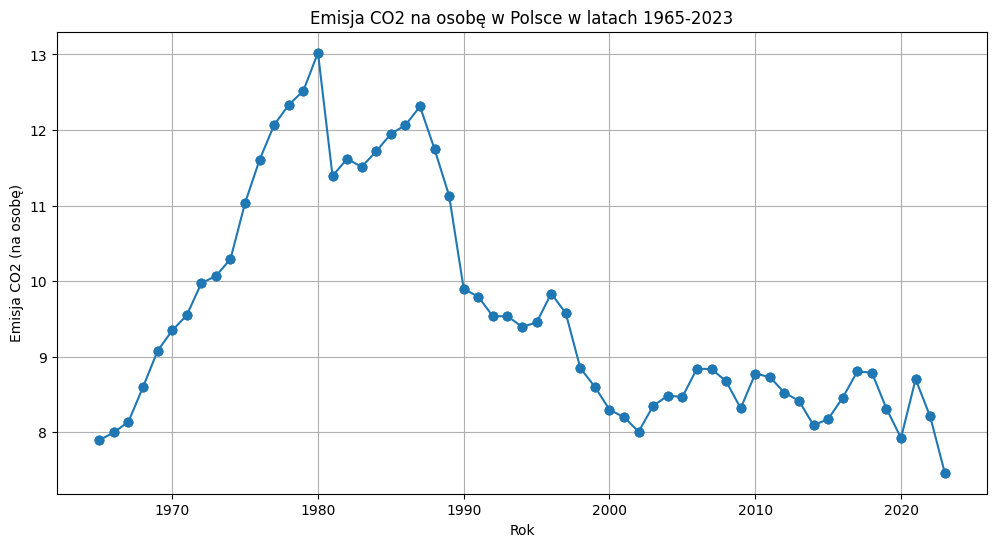

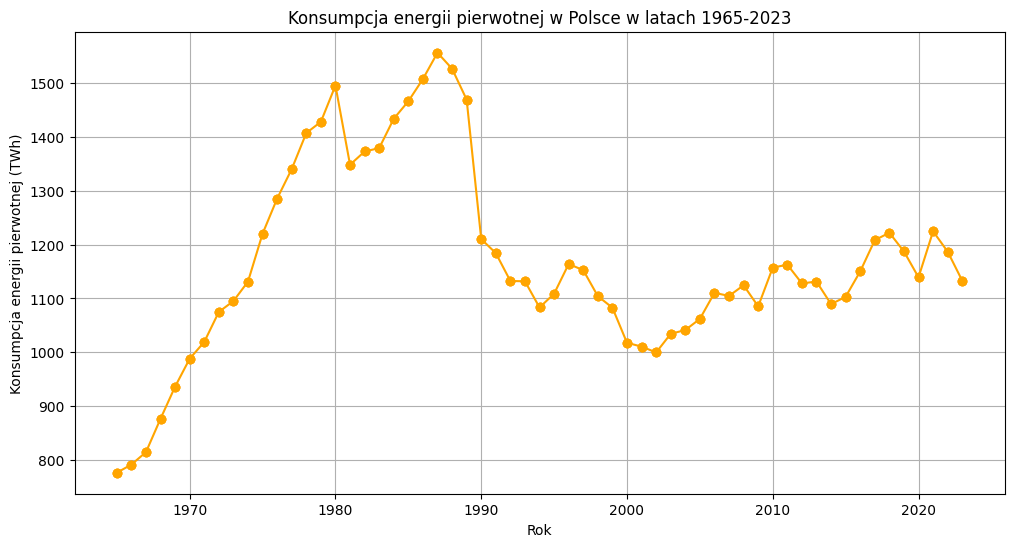


Korelacja między emisją CO2 a konsumpcją energii w Poland: 0.82


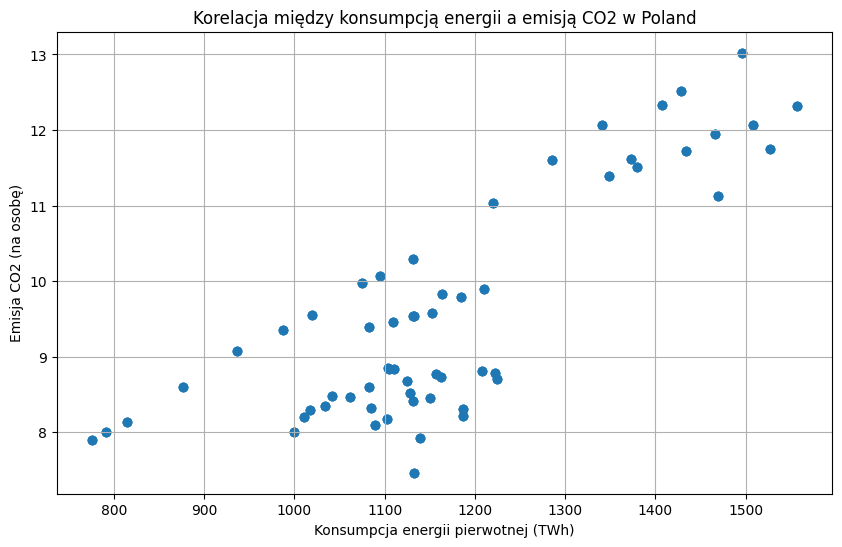

In [ ]:
# Cz4
country_to_visualize = 'Poland'
conn = sqlite3.connect('energy_co2.db')
df_viz = pd.read_sql_query(f"SELECT Rok, \"Emisja CO2 (na osobę)\", \"Konsumpcja energii pierwotnej (TWh)\" FROM energy_data WHERE Kraj = '{country_to_visualize}'", conn)
conn.close()

print(f"Dane wczytane dla kraju: {country_to_visualize}")
display(df_viz.head())
print(f"Ramka pusta? {df_viz.empty}")
df_viz['Rok'] = pd.to_numeric(df_viz['Rok'])
df_viz = df_viz.sort_values(by='Rok')

plt.figure(figsize=(12, 6))
plt.plot(df_viz['Rok'], df_viz['Emisja CO2 (na osobę)'], marker='o', linestyle='-')
plt.title(f'Emisja CO2 na osobę w Polsce w latach 1965-2023')
plt.xlabel('Rok')
plt.ylabel('Emisja CO2 (na osobę)')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df_viz['Rok'], df_viz['Konsumpcja energii pierwotnej (TWh)'], marker='o', linestyle='-', color='orange')
plt.title(f'Konsumpcja energii pierwotnej w Polsce w latach 1965-2023')
plt.xlabel('Rok')
plt.ylabel('Konsumpcja energii pierwotnej (TWh)')
plt.grid(True)
plt.show()

# Korelacja
correlation = df_viz['Emisja CO2 (na osobę)'].corr(df_viz['Konsumpcja energii pierwotnej (TWh)'])
print(f"\nKorelacja między emisją CO2 a konsumpcją energii w {country_to_visualize}: {correlation:.2f}")
plt.figure(figsize=(10, 6))
plt.scatter(df_viz['Konsumpcja energii pierwotnej (TWh)'], df_viz['Emisja CO2 (na osobę)'])
plt.title(f'Korelacja między konsumpcją energii a emisją CO2 w {country_to_visualize}')
plt.xlabel('Konsumpcja energii pierwotnej (TWh)')
plt.ylabel('Emisja CO2 (na osobę)')
plt.grid(True)
plt.show()

In [ ]:
df_co2 = pd.read_csv("/content/co2-emissions-per-capita.csv")
df_co2.head()

,Entity,Year,Annual CO₂ emissions (per capita)
0,Afghanistan,1949,0.001992
1,Afghanistan,1950,0.010837
2,Afghanistan,1951,0.011625
3,Afghanistan,1952,0.011468
4,Afghanistan,1953,0.013123


In [ ]:
df_primary_energy = pd.read_csv("/content/primary-energy-cons.csv")
df_primary_energy.head()

,Entity,Code,Year,Primary energy consumption (TWh)
0,Afghanistan,AFG,1980,6.337187
1,Afghanistan,AFG,1981,7.289555
2,Afghanistan,AFG,1982,7.889244
3,Afghanistan,AFG,1983,9.882159
4,Afghanistan,AFG,1984,9.929878
